## 傾向スコア
- 岩波DS vol.3 CM接触のアプリ利用への因果効果推定（https://github.com/iwanami-datascience/vol3/tree/master/kato%26hoshino ）

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score

### データの読み込み

In [2]:
data = pd.read_csv('./q_data_x.csv')
data.columns

Index(['cm_dummy', 'gamedummy', 'area_kanto', 'area_keihan', 'area_tokai',
       'area_keihanshin', 'age', 'sex', 'marry_dummy', 'job_dummy1',
       'job_dummy2', 'job_dummy3', 'job_dummy4', 'job_dummy5', 'job_dummy6',
       'job_dummy7', 'job_dummy8', 'inc', 'pmoney', 'fam_str_dummy1',
       'fam_str_dummy2', 'fam_str_dummy3', 'fam_str_dummy4', 'fam_str_dummy5',
       'child_dummy', 'T', 'F1', 'F2', 'F3', 'M1', 'M2', 'M3', 'TVwatch_day',
       'gamesecond', 'gamecount'],
      dtype='object')

In [3]:
X = data[['TVwatch_day', 'age', 'sex', 'marry_dummy', 'child_dummy', 'inc', 'pmoney','area_kanto', 'area_tokai', 'area_keihanshin', 
          'job_dummy1', 'job_dummy2', 'job_dummy3', 'job_dummy4', 'job_dummy5', 'job_dummy6', 'job_dummy7',
          'fam_str_dummy1', 'fam_str_dummy2', 'fam_str_dummy3', 'fam_str_dummy4']]
Z = data['cm_dummy']

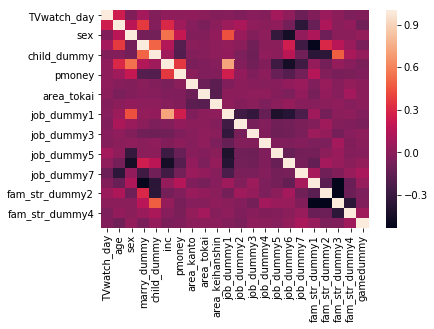

In [35]:
corr_df = pd.concat([X, data['gamedummy']], axis=1).corr()
sns.heatmap(corr_df)
plt.show()

In [37]:
corr_df['gamedummy']

TVwatch_day       -0.035602
age               -0.093122
sex                0.030390
marry_dummy       -0.058177
child_dummy        0.040967
inc               -0.051586
pmoney            -0.041161
area_kanto         0.011295
area_tokai         0.004236
area_keihanshin    0.000598
job_dummy1        -0.026969
job_dummy2        -0.054174
job_dummy3         0.017070
job_dummy4        -0.003819
job_dummy5        -0.015527
job_dummy6         0.034491
job_dummy7         0.106322
fam_str_dummy1     0.044624
fam_str_dummy2    -0.044674
fam_str_dummy3    -0.037861
fam_str_dummy4     0.069329
gamedummy          1.000000
Name: gamedummy, dtype: float64

### 傾向スコアの推定
- $e(X_i) = p(Z_i=1|X_i)$

ユーザー$i$が処置群に存在する（$Z_i=1$）確率

In [8]:
lr = LogisticRegression()
lr.fit(X, Z)

C:\Users\UU138613\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
ps = lr.predict_proba(X)[:, 1]
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))

AUC = 0.789


In [7]:
logit_model = sm.Logit(endog=Z, exog=X)
logit_res = logit_model.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.544505
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               cm_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.1974
Time:                        16:34:32   Log-Likelihood:                -5445.1
converged:                       True   LL-Null:                       -6784.2
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
TVwatch_day         0.0001   4.13e-06     31.870      0.000       0.000       0.000
age                -0.0120      0.003     -4.609      0.000      -0.017      -0.007
sex                -0.0456      0.064     -0.713      0.476      -0.171       0.080
marry_dummy         0.0214      0.084      0.254      0.800      -0.144       0.187
child_dummy         0.2383      0.073      3.243      0.001       0.094       0.382
inc                -0.0003      0.000     -1.685      0.092      -0.001    4.51e-05
pmoney              0.0078      0.008      1.016      0.310      -0.007       0.023
area_kanto          0.3914      0.079      4.962      0.000       0.237       0.546
area_tokai         -0.7446      0.076     -9.772      0.000      -0.894      -0.595
area_keihanshin    -2.0444      0.075    -27.136      0.000      -2.192      -1.897
job_dummy1         -0.3887      0.130     -2.988      0.003      -0.644      -0.134
job_dummy2         -0.3374      0.149     -2.270      0.023      -0.629      -0.046
job_dummy3          0.0154      0.139      0.111      0.912      -0.257       0.288
job_dummy4         -0.1513      0.229     -0.661      0.508      -0.599       0.297
job_dummy5          0.1037      0.128      0.813      0.416      -0.146       0.354
job_dummy6         -0.2615      0.134     -1.948      0.051      -0.525       0.002
job_dummy7         -0.4314      0.161     -2.684      0.007      -0.746      -0.116
fam_str_dummy1     -0.1472      0.145     -1.016      0.310      -0.431       0.137
fam_str_dummy2      0.0439      0.157      0.279      0.780      -0.265       0.352
fam_str_dummy3     -0.2868      0.143     -2.004      0.045      -0.567      -0.006
fam_str_dummy4     -0.7289      0.169     -4.321      0.000      -1.059      -0.398
===================================================================================
"""

In [10]:
ps = logit_res.predict(X)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))

AUC = 0.787


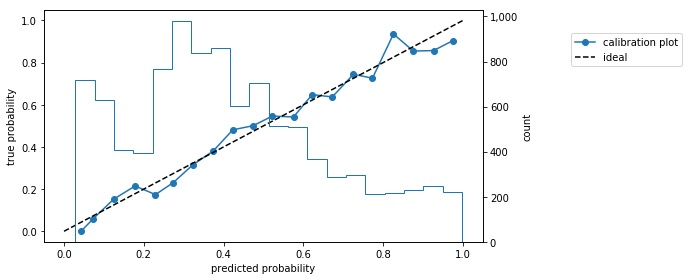

In [13]:
_, ax1 = plt.subplots(figsize=(10, 4))

prob_true, prob_pred = calibration_curve(y_true=Z, y_prob=ps, n_bins=20)
ax1.plot(prob_pred, prob_true, marker='o', label='calibration plot')
ax1.plot([0,1], [0,1], linestyle='--', color='black', label='ideal')
ax1.legend(bbox_to_anchor=(1.2, 0.9), loc='upper left', borderaxespad=0) # 凡例はグラフの外
ax1.set_xlabel('predicted probability')
ax1.set_ylabel('true probability')

ax2 = ax1.twinx()
ax2.hist(ps, bins=20, histtype="step", rwidth=0.9)
ax2.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # 軸ラベル　3桁ごとにカンマ
ax2.set_ylabel('count')
plt.tight_layout()
plt.show()

### 共変量の分布

In [14]:
ps_df = pd.DataFrame(ps, columns=['ps'])
data = pd.concat([data, ps_df], axis=1)

In [21]:
def plot_continuous_covariate_distribution(data, var_name):
    data1 = data.loc[data['cm_dummy']==1]
    data0 = data.loc[data['cm_dummy']==0]
    
    x_min = np.min(data[var_name])
    x_max = np.max(data[var_name])
    
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    sns.distplot(data1[var_name], label='Z=1')
    sns.distplot(data0[var_name], label='Z=0')
    plt.title('original')
    plt.xlabel(var_name)
    plt.ylabel('density')
    plt.xlim([0.9*x_min, 1.1*x_max])
    plt.legend()

    plt.subplot(1,2,2)
    sns.distplot(data1[var_name], label='Z=1')
    w01 = data0['ps']/(1-data0['ps'])
    sns.distplot(data0[var_name]*w01, label='Z=0')
    plt.title('ATT')
    plt.xlabel(var_name)
    plt.ylabel('density')
    plt.xlim([0.9*x_min, 1.1*x_max])
    plt.legend()
    
    plt.show()

In [24]:
def calculate_normalized_difference(data, var_name):
    X1 = data.loc[data['cm_dummy']==1, var_name]
    X0 = data.loc[data['cm_dummy']==0, var_name]
    ps01 = data.loc[data['cm_dummy']==0, 'ps']
    w01 = ps01 / (1-ps01)
    X01 = X0 * w01
    
    print(var_name + ':')
    print('difference between treated and untreated = {:.2f}'.format(abs(np.mean(X1) - np.mean(X0)) / np.sqrt(np.var(X1)/len(X1) + np.var(X0)/len(X0))))
    print('difference between treated and adjusted untreated = {:.2f}'.format(abs(np.mean(X1) - np.mean(X01)) / np.sqrt(np.var(X1)/len(X1) + np.var(X01)/len(X01))))

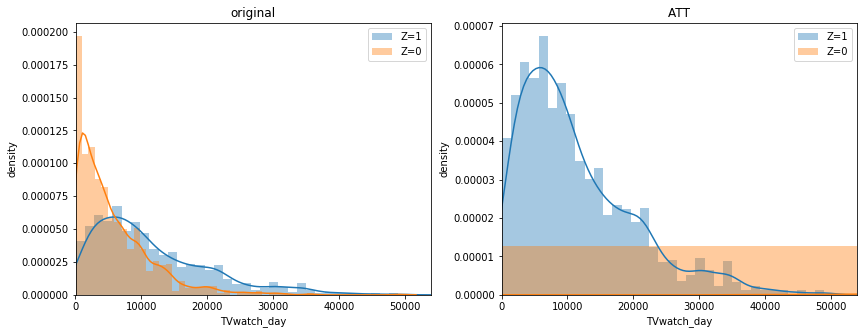

TVwatch_day:
difference between treated and untreated = 36.77
difference between treated and adjusted untreated = 0.97


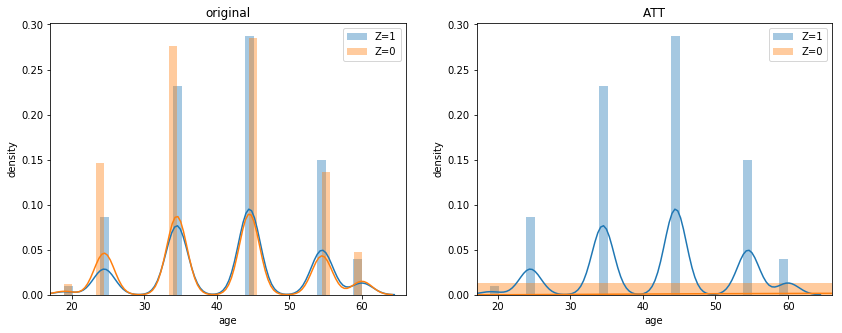

age:
difference between treated and untreated = 7.52
difference between treated and adjusted untreated = 3.73


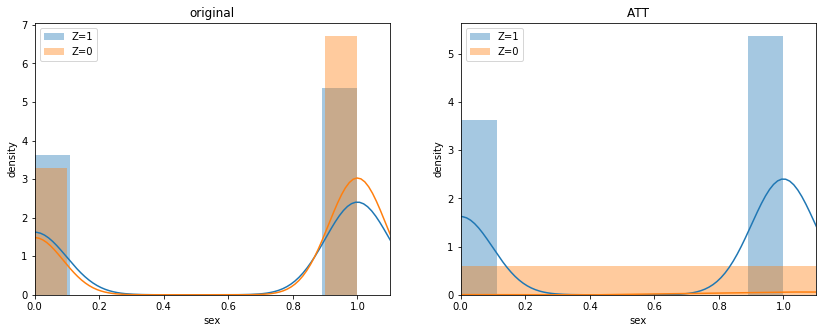

sex:
difference between treated and untreated = 7.60
difference between treated and adjusted untreated = 2.24


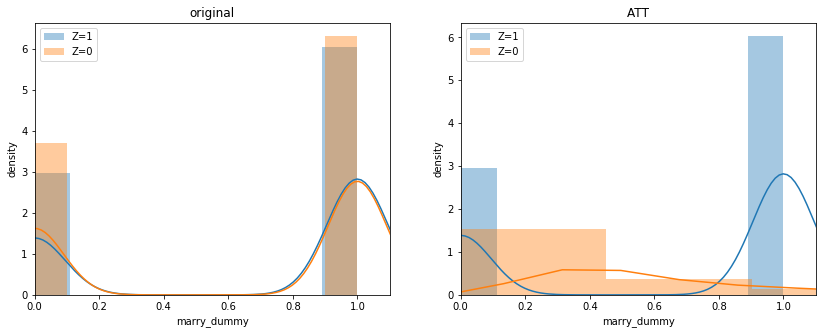

marry_dummy:
difference between treated and untreated = 4.14
difference between treated and adjusted untreated = 6.69


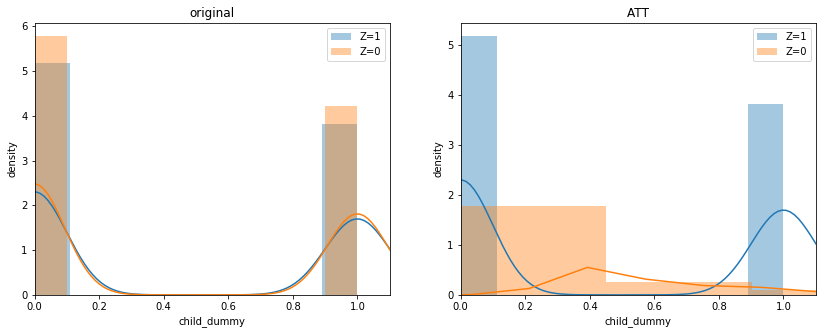

child_dummy:
difference between treated and untreated = 0.25
difference between treated and adjusted untreated = 8.43


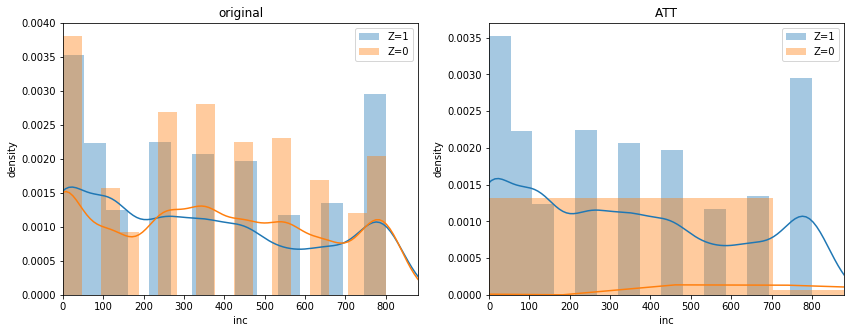

inc:
difference between treated and untreated = 5.06
difference between treated and adjusted untreated = 2.59


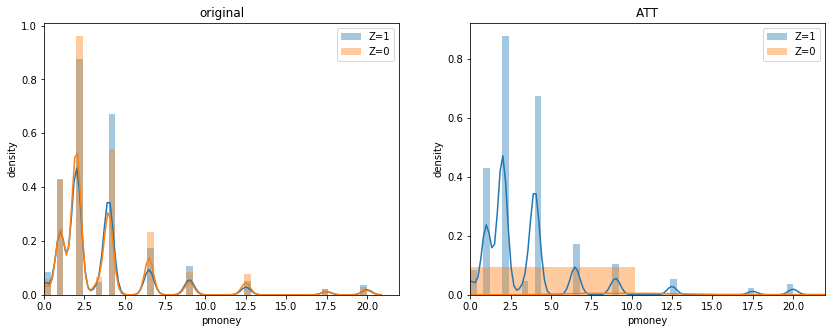

pmoney:
difference between treated and untreated = 0.20
difference between treated and adjusted untreated = 2.79


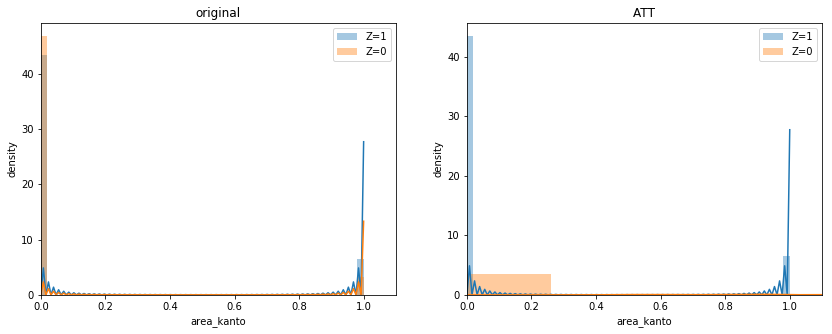

area_kanto:
difference between treated and untreated = 11.10
difference between treated and adjusted untreated = 3.97


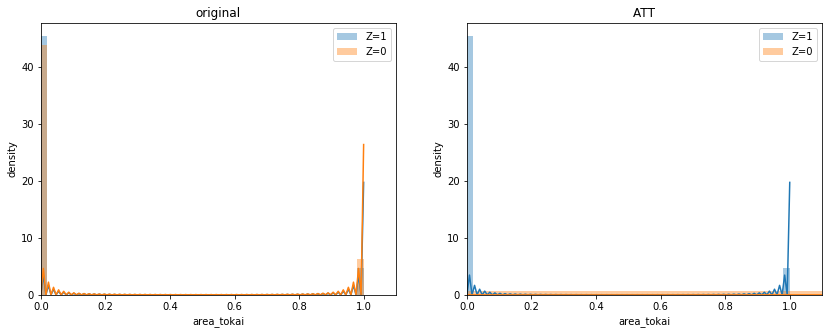

area_tokai:
difference between treated and untreated = 5.02
difference between treated and adjusted untreated = 2.62


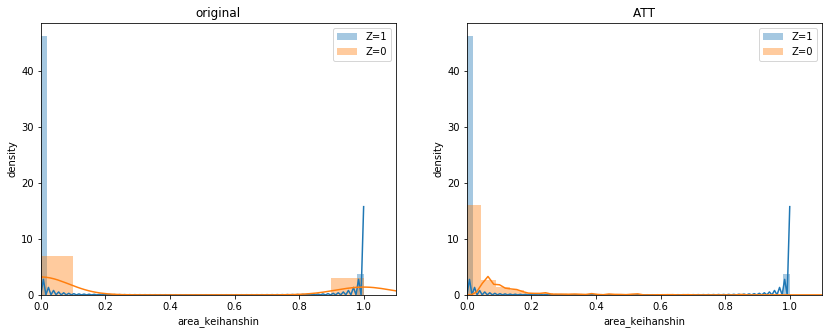

area_keihanshin:
difference between treated and untreated = 31.52
difference between treated and adjusted untreated = 5.04


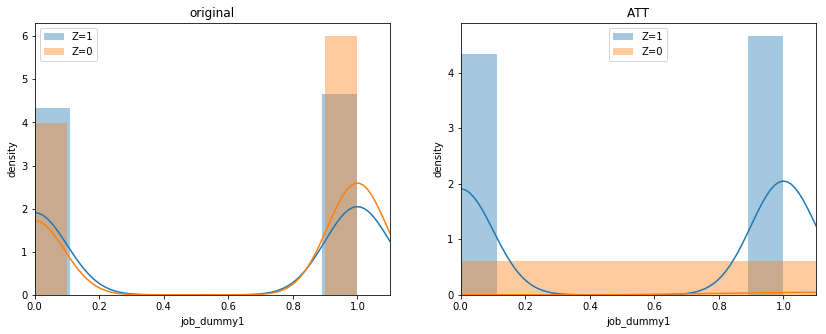

job_dummy1:
difference between treated and untreated = 8.25
difference between treated and adjusted untreated = 0.86


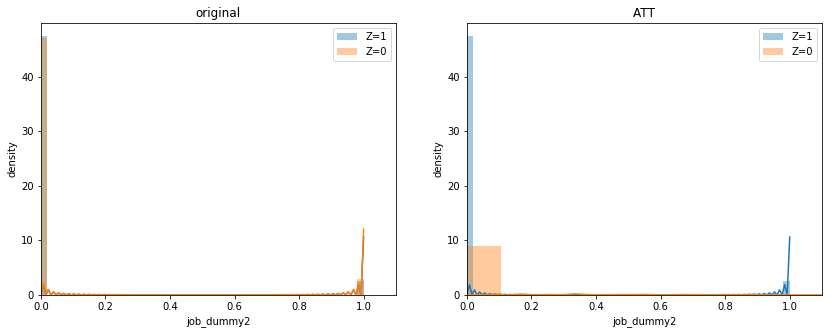

job_dummy2:
difference between treated and untreated = 1.50
difference between treated and adjusted untreated = 1.09


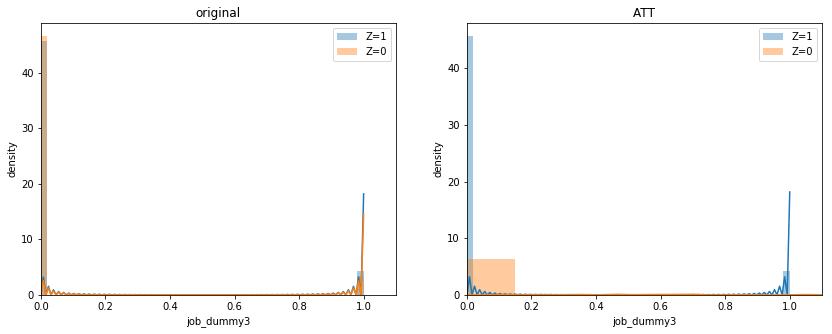

job_dummy3:
difference between treated and untreated = 3.13
difference between treated and adjusted untreated = 5.55


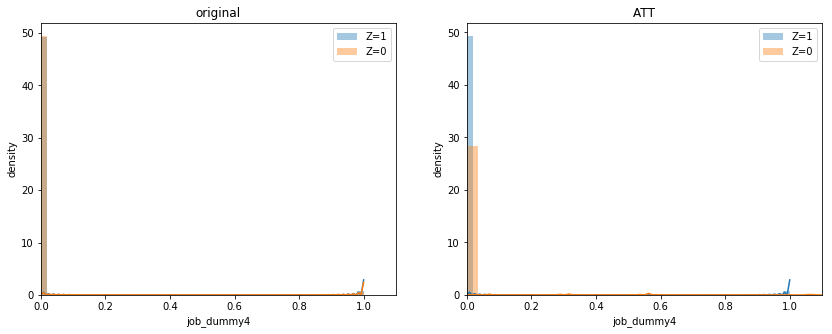

job_dummy4:
difference between treated and untreated = 0.91
difference between treated and adjusted untreated = 2.49


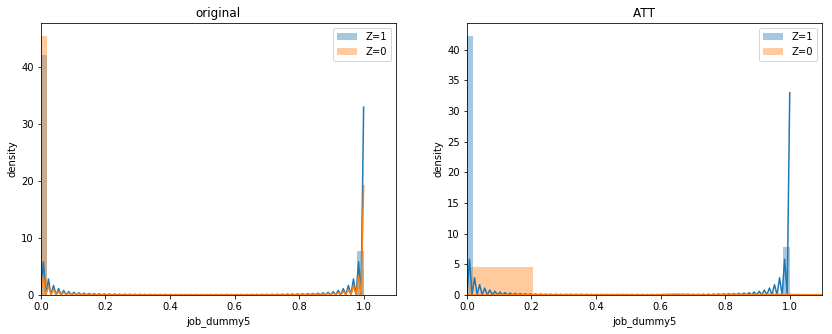

job_dummy5:
difference between treated and untreated = 9.63
difference between treated and adjusted untreated = 8.38


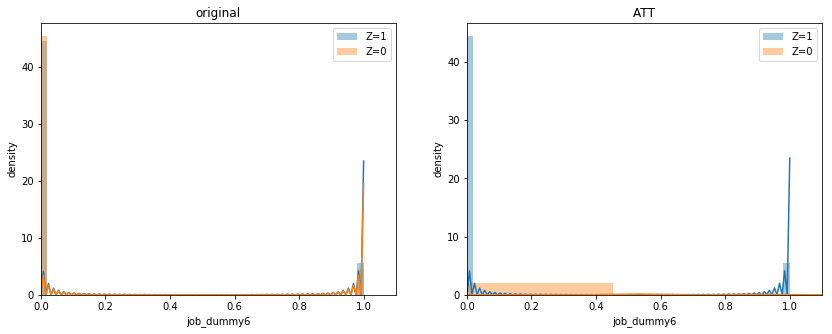

job_dummy6:
difference between treated and untreated = 3.07
difference between treated and adjusted untreated = 1.58


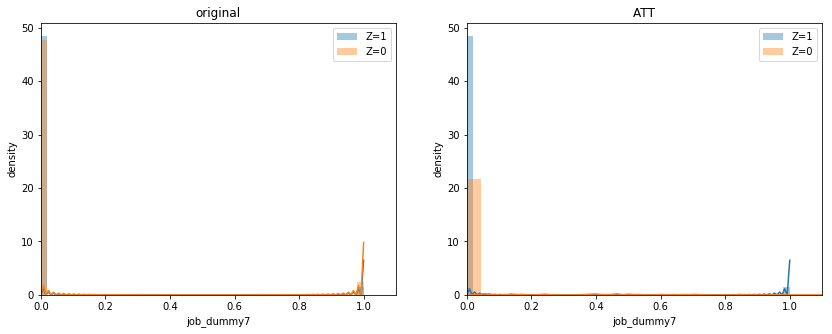

job_dummy7:
difference between treated and untreated = 4.12
difference between treated and adjusted untreated = 2.81


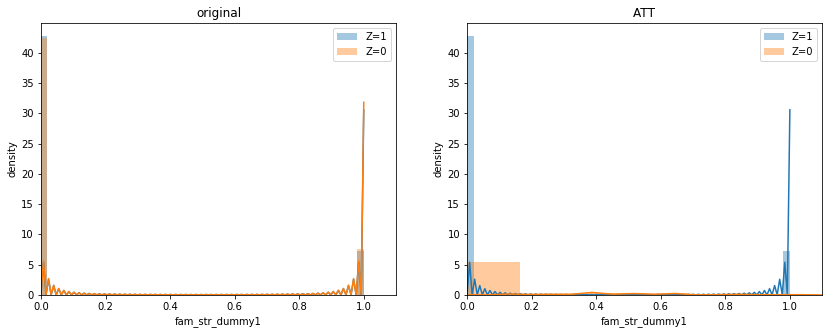

fam_str_dummy1:
difference between treated and untreated = 0.82
difference between treated and adjusted untreated = 5.99


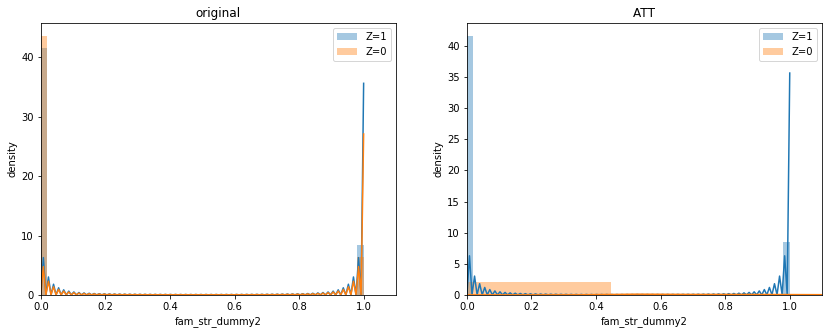

fam_str_dummy2:
difference between treated and untreated = 5.55
difference between treated and adjusted untreated = 1.18


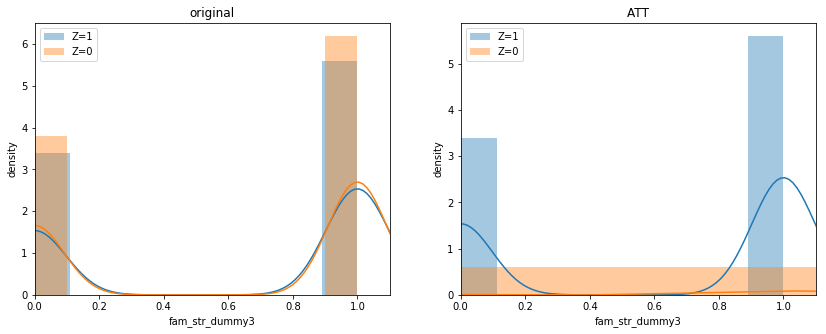

fam_str_dummy3:
difference between treated and untreated = 0.34
difference between treated and adjusted untreated = 2.98


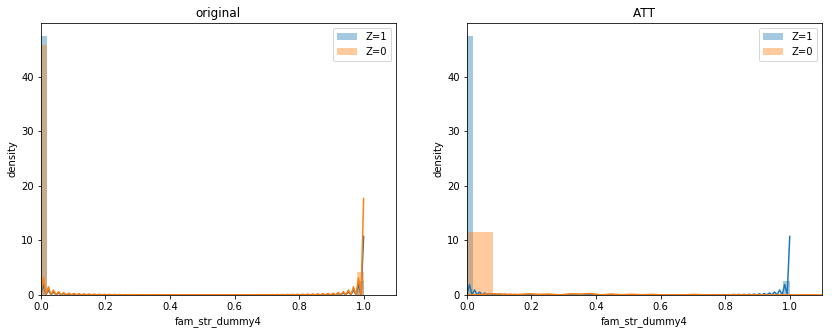

fam_str_dummy4:
difference between treated and untreated = 6.61
difference between treated and adjusted untreated = 3.73


In [26]:
for col in X.columns:
    plot_continuous_covariate_distribution(data=data, var_name=col)
    calculate_normalized_difference(data=data, var_name=col)

### 因果効果推定

- CM接触群とCM非接触群の平均値の比較差 

$E(Y_1|Z=1) - E(Y_0|Z=0)$

割り付け$Z$がランダムであれば、$Z$の因果効果は正しく推定できる

In [28]:
data1 = data[data['cm_dummy']==1]
data0 = data[data['cm_dummy']==0]

E11 = np.mean(data1['gamedummy'])
E00 = np.mean(data0['gamedummy'])
diff = E11 - E00

print('diff = {:.3f}, (E(Y1|Z=1) = {:.3f}, E(Y0|Z=0) = {:.3f})'.format(diff, E11, E00))

diff = 0.002, (E(Y1|Z=1) = 0.075, E(Y0|Z=0) = 0.073)


- 平均処置効果（ATE, Average Treatment Effect）

$ATE = E(Y_1) - E(Y_0)$

（すべての人がCMに接触した場合のアプリ利用）-（すべての人がCMに接触しない場合のアプリ利用）

In [31]:
Z = data['cm_dummy']
Y = data['gamedummy']
ps = data['ps']
w1 = Z / ps
w0 = (1-Z) / (1-ps)

E1 = np.sum(Y * w1) / np.sum(w1)
E0 = np.sum(Y * w0) / np.sum(w0)
ATE = E1 - E0

print('ATE = {:.3f}, (E1 = {:.3f}, E0 = {:.3f})'.format(ATE, E1, E0))

ATE = 0.024, (E1 = 0.086, E0 = 0.062)


- 処置群における平均処置効果（ATT, Average Treatment effect on the Treated）

$ATT=E(Y_1|Z=1)-E(Y_0|Z=1)$

CM接触者におけるアプリ利用の伸び

In [29]:
Z = data['cm_dummy']
Y = data['gamedummy']
ps = data['ps']
w01 = (1-Z)*ps / (1-ps)

E11 = np.mean(Y[Z==1])
E01 = np.sum(Y * w01) / np.sum(w01)
ATT = E11 - E01

print('ATT = {:.3f}, (E11 = {:.3f}, E01 = {:.3f})'.format(ATT, E11, E01))

ATT = 0.026, (E11 = 0.075, E01 = 0.049)
